<a href="https://colab.research.google.com/github/luguitar/ML_Books/blob/master/20210504_Live_Fronteira_Eficiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [7]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!pip install yfinance
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [9]:
# Selecionar ativos da carteira

In [10]:
ativos = ['ABEV3.SA', 'EQTL3.SA', 'LREN3.SA', 'CIEL3.SA', 'RADL3.SA', 'RENT3.SA', 'MDIA3.SA', 'WEGE3.SA', 'EZTC3.SA', 'FLRY3.SA']

In [ ]:
# Criar um dataframe que vai conter as cotações diárias dessas ações

In [16]:
df = yf.download(ativos,start="2012-01-01", end="2022-07-31")
acoes=df['Close']
acoes.tail()

[*********************100%***********************]  10 of 10 completed


,ABEV3.SA,CIEL3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,LREN3.SA,MDIA3.SA,RADL3.SA,RENT3.SA,WEGE3.SA
Date,,,,,,,,,,
2022-07-25,14.68,4.10,23.290001,16.360001,15.00,24.700001,30.799999,20.250000,56.250000,26.480000
2022-07-26,14.82,4.14,23.480000,16.190001,15.14,24.040001,31.049999,19.730000,54.950001,26.200001
2022-07-27,14.98,4.30,24.120001,16.500000,15.53,25.219999,31.760000,20.290001,57.500000,26.870001
2022-07-28,15.10,4.28,24.490000,17.240000,15.94,25.969999,31.290001,20.670000,57.540001,27.930000
2022-07-29,14.93,4.43,24.809999,16.879999,16.17,25.290001,31.150000,20.980000,57.610001,28.040001


In [ ]:
# Visualizando os preços

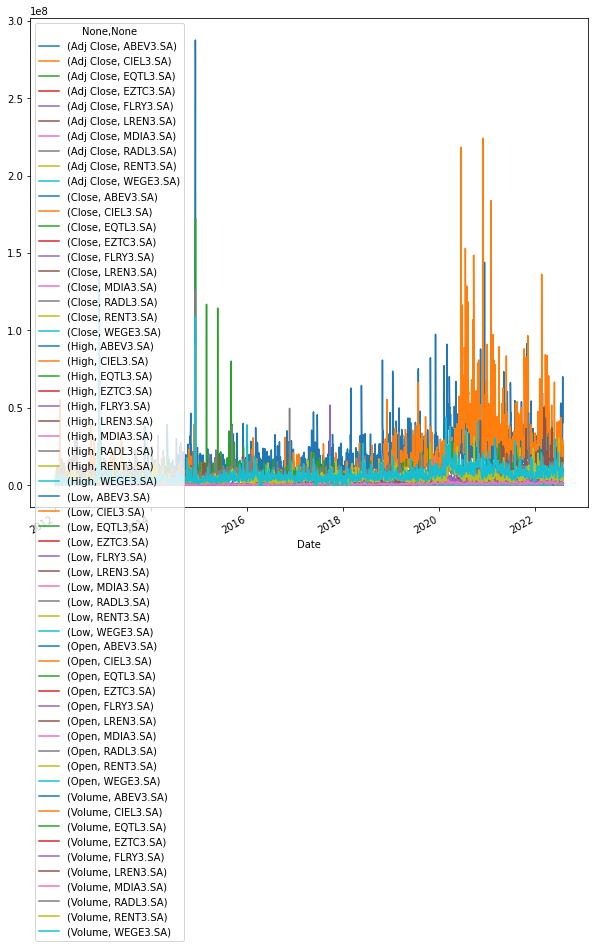

In [17]:
df.plot(figsize = (10,10))

In [18]:
df.head()

Adj Close                                                    \
            ABEV3.SA  CIEL3.SA  EQTL3.SA  EZTC3.SA  FLRY3.SA  LREN3.SA   
Date                                                                     
2012-01-02  7.493660  6.224105  2.073644  7.370785  7.085641  6.841024   
2012-01-03  7.408255  6.247275  2.026442  7.599690  7.228552  6.814198   
2012-01-04  7.236065  6.269160  2.058995  7.659207  7.182022  6.743106   
2012-01-05  7.092807  6.179048  2.067134  7.347893  7.145465  6.972482   
2012-01-06  7.074899  6.140431  2.075272  7.384520  7.178700  7.069060   

                                                     ...   Volume           \
             MDIA3.SA  RADL3.SA  RENT3.SA  WEGE3.SA  ... ABEV3.SA CIEL3.SA   
Date                                                 ...                     
2012-01-02  12.754274  2.380456  5.706104  2.237936  ...   119582  6226274   
2012-01-03  12.680249  2.416523  5.877988  2.290707  ...  2099952  5319032   
2012-01-04  12.929743  2.416523  5.655176  2.302700  ...   989684  6122760   
2012-01-05  13.014731  2.398489  5.479050  2.317092  ...  1077745  7355971   
2012-01-06  12.995543  2.389472  5.517244  2.290707  ...   451312  5692280   

                                                                           \
           EQTL3.SA EZTC3.SA FLRY3.SA LREN3.SA MDIA3.SA RADL3.SA RENT3.SA   
Date                                                                        
2012-01-02   729740   368991    84400  3348545    65700   837000  8486317   
2012-01-03  2817008   790327   525000  5279858   140100  3411500  5321833   
2012-01-04  1583028   515934   174400  6126294   245700  3863500  4876611   
2012-01-05  1128510   696681   136600  8310075   387300  2282500  3120725   
2012-01-06   854293   521250    39800  6861742    56700   753000  2161170   

                     
           WEGE3.SA  
Date                 
2012-01-02   367068  
2012-01-03  6269900  
2012-01-04  1139060  
2012-01-05   757796  
2012-01-06  3437460  

[5 rows x 60 columns]

In [ ]:
# Calculando retorno diário dos papéis

In [19]:
retorno_diario = df.pct_change()

In [20]:
retorno_diario.head()

Adj Close                                                    \
            ABEV3.SA  CIEL3.SA  EQTL3.SA  EZTC3.SA  FLRY3.SA  LREN3.SA   
Date                                                                     
2012-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2012-01-03 -0.011397  0.003723 -0.022763  0.031056  0.020169 -0.003921   
2012-01-04 -0.023243  0.003503  0.016064  0.007831 -0.006437 -0.010433   
2012-01-05 -0.019798 -0.014374  0.003953 -0.040646 -0.005090  0.034016   
2012-01-06 -0.002525 -0.006250  0.003937  0.004985  0.004651  0.013851   

                                                    ...     Volume            \
            MDIA3.SA  RADL3.SA  RENT3.SA  WEGE3.SA  ...   ABEV3.SA  CIEL3.SA   
Date                                                ...                        
2012-01-02       NaN       NaN       NaN       NaN  ...        NaN       NaN   
2012-01-03 -0.005804  0.015151  0.030123  0.023580  ...  16.560770 -0.145712   
2012-01-04  0.019676  0.000000 -0.037906  0.005236  ...  -0.528711  0.151104   
2012-01-05  0.006573 -0.007463 -0.031144  0.006250  ...   0.088979  0.201414   
2012-01-06 -0.001474 -0.003759  0.006971 -0.011387  ...  -0.581244 -0.226169   

                                                                        \
            EQTL3.SA  EZTC3.SA  FLRY3.SA  LREN3.SA  MDIA3.SA  RADL3.SA   
Date                                                                     
2012-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2012-01-03  2.860290  1.141860  5.220379  0.576762  1.132420  3.075866   
2012-01-04 -0.438046 -0.347189 -0.667810  0.160314  0.753747  0.132493   
2012-01-05 -0.287119  0.350330 -0.216743  0.356460  0.576313 -0.409214   
2012-01-06 -0.242990 -0.251810 -0.708638 -0.174286 -0.853602 -0.670099   

                                 
            RENT3.SA   WEGE3.SA  
Date                             
2012-01-02       NaN        NaN  
2012-01-03 -0.372893  16.081031  
2012-01-04 -0.083660  -0.818329  
2012-01-05 -0.360063  -0.334718  
2012-01-06 -0.307478   3.536128  

[5 rows x 60 columns]

In [21]:
retorno_diario = retorno_diario.iloc[1:]

In [22]:
retorno_diario.head()

Adj Close                                                    \
            ABEV3.SA  CIEL3.SA  EQTL3.SA  EZTC3.SA  FLRY3.SA  LREN3.SA   
Date                                                                     
2012-01-03 -0.011397  0.003723 -0.022763  0.031056  0.020169 -0.003921   
2012-01-04 -0.023243  0.003503  0.016064  0.007831 -0.006437 -0.010433   
2012-01-05 -0.019798 -0.014374  0.003953 -0.040646 -0.005090  0.034016   
2012-01-06 -0.002525 -0.006250  0.003937  0.004985  0.004651  0.013851   
2012-01-09 -0.001947  0.003983  0.000000  0.013019  0.007870  0.005123   

                                                    ...     Volume            \
            MDIA3.SA  RADL3.SA  RENT3.SA  WEGE3.SA  ...   ABEV3.SA  CIEL3.SA   
Date                                                ...                        
2012-01-03 -0.005804  0.015151  0.030123  0.023580  ...  16.560770 -0.145712   
2012-01-04  0.019676  0.000000 -0.037906  0.005236  ...  -0.528711  0.151104   
2012-01-05  0.006573 -0.007463 -0.031144  0.006250  ...   0.088979  0.201414   
2012-01-06 -0.001474 -0.003759  0.006971 -0.011387  ...  -0.581244 -0.226169   
2012-01-09  0.004219  0.003774  0.023846  0.000000  ...  -0.219513 -0.037769   

                                                                        \
            EQTL3.SA  EZTC3.SA  FLRY3.SA  LREN3.SA  MDIA3.SA  RADL3.SA   
Date                                                                     
2012-01-03  2.860290  1.141860  5.220379  0.576762  1.132420  3.075866   
2012-01-04 -0.438046 -0.347189 -0.667810  0.160314  0.753747  0.132493   
2012-01-05 -0.287119  0.350330 -0.216743  0.356460  0.576313 -0.409214   
2012-01-06 -0.242990 -0.251810 -0.708638 -0.174286 -0.853602 -0.670099   
2012-01-09 -0.148736 -0.054916  5.688442 -0.364646 -0.174603  0.578353   

                                 
            RENT3.SA   WEGE3.SA  
Date                             
2012-01-03 -0.372893  16.081031  
2012-01-04 -0.083660  -0.818329  
2012-01-05 -0.360063  -0.334718  
2012-01-06 -0.307478   3.536128  
2012-01-09  0.193797  -0.268830  

[5 rows x 60 columns]

In [23]:
retorno_anual = retorno_diario.mean()*250

In [24]:
cov_diario = retorno_diario.cov()

In [25]:
cov_diario

Adj Close                                          \
                    ABEV3.SA  CIEL3.SA  EQTL3.SA  EZTC3.SA  FLRY3.SA   
Adj Close ABEV3.SA  0.000287  0.000149  0.000093  0.000160  0.000091   
          CIEL3.SA  0.000149  0.000685  0.000147  0.000238  0.000132   
          EQTL3.SA  0.000093  0.000147  0.000295  0.000195  0.000114   
          EZTC3.SA  0.000160  0.000238  0.000195  0.000684  0.000186   
          FLRY3.SA  0.000091  0.000132  0.000114  0.000186  0.000401   
          LREN3.SA  0.000157  0.000218  0.000170  0.000330  0.000176   
          MDIA3.SA  0.000118  0.000160  0.000094  0.000199  0.000112   
          RADL3.SA  0.000108  0.000137  0.000090  0.000155  0.000104   
          RENT3.SA  0.000149  0.000233  0.000173  0.000340  0.000176   
          WEGE3.SA  0.000119  0.000142  0.000106  0.000177  0.000111   
Close     ABEV3.SA  0.000285  0.000149  0.000094  0.000160  0.000092   
          CIEL3.SA  0.000148  0.000682  0.000146  0.000237  0.000132   
          EQTL3.SA  0.000094  0.000147  0.000295  0.000195  0.000114   
          EZTC3.SA  0.000160  0.000238  0.000195  0.000683  0.000185   
          FLRY3.SA  0.000091  0.000132  0.000114  0.000186  0.000401   
          LREN3.SA  0.000157  0.000218  0.000169  0.000330  0.000176   
          MDIA3.SA  0.000118  0.000158  0.000094  0.000199  0.000112   
          RADL3.SA  0.000108  0.000137  0.000090  0.000156  0.000104   
          RENT3.SA  0.000149  0.000232  0.000173  0.000340  0.000178   
          WEGE3.SA  0.000119  0.000142  0.000106  0.000177  0.000111   
High      ABEV3.SA  0.000175  0.000082  0.000055  0.000124  0.000062   
          CIEL3.SA  0.000078  0.000401  0.000083  0.000152  0.000081   
          EQTL3.SA  0.000060  0.000102  0.000166  0.000140  0.000083   
          EZTC3.SA  0.000102  0.000152  0.000108  0.000417  0.000118   
          FLRY3.SA  0.000060  0.000093  0.000073  0.000149  0.000240   
          LREN3.SA  0.000109  0.000159  0.000114  0.000257  0.000128   
          MDIA3.SA  0.000063  0.000100  0.000048  0.000142  0.000071   
          RADL3.SA  0.000070  0.000086  0.000054  0.000124  0.000071   
          RENT3.SA  0.000107  0.000179  0.000117  0.000253  0.000132   
          WEGE3.SA  0.000075  0.000094  0.000066  0.000143  0.000072   
Low       ABEV3.SA  0.000166  0.000097  0.000066  0.000119  0.000056   
          CIEL3.SA  0.000090  0.000318  0.000093  0.000162  0.000065   
          EQTL3.SA  0.000067  0.000107  0.000162  0.000164  0.000078   
          EZTC3.SA  0.000110  0.000158  0.000128  0.000408  0.000123   
          FLRY3.SA  0.000064  0.000092  0.000074  0.000160  0.000213   
          LREN3.SA  0.000127  0.000166  0.000129  0.000292  0.000144   
          MDIA3.SA  0.000076  0.000113  0.000066  0.000165  0.000077   
          RADL3.SA  0.000070  0.000076  0.000059  0.000125  0.000064   
          RENT3.SA  0.000120  0.000160  0.000132  0.000289  0.000137   
          WEGE3.SA  0.000068  0.000101  0.000066  0.000149  0.000072   
Open      ABEV3.SA  0.000066  0.000050  0.000037  0.000089  0.000036   
          CIEL3.SA  0.000041  0.000068  0.000049  0.000105  0.000034   
          EQTL3.SA  0.000043  0.000070  0.000048  0.000099  0.000042   
          EZTC3.SA  0.000042  0.000065  0.000033  0.000131  0.000041   
          FLRY3.SA  0.000030  0.000051  0.000034  0.000093  0.000054   
          LREN3.SA  0.000080  0.000104  0.000065  0.000182  0.000074   
          MDIA3.SA  0.000013  0.000040  0.000025  0.000072  0.000022   
          RADL3.SA  0.000044  0.000051  0.000041  0.000103  0.000036   
          RENT3.SA  0.000083  0.000110  0.000069  0.000186  0.000076   
          WEGE3.SA  0.000038  0.000065  0.000038  0.000128  0.000043   
Volume    ABEV3.SA  0.011802 -0.040078 -0.014126 -0.091394 -0.003957   
          CIEL3.SA  0.003085  0.006194 -0.000131  0.001027  0.001801   
          EQTL3.SA  0.016720 -0.056166 -0.023838 -0.145270 -0.014832   
          EZTC3.SA  0.004386 -0.001053 -0.001585 -0.009358 

In [26]:
cov_anual = cov_diario*250

# Iniciando Simulação de Monte Carlo

In [ ]:
# Aqui vamos criar 200 mil portfólios fictícios com esses papéis

In [27]:
port_returns = []

port_volatility = []

stock_weights = []

In [ ]:
# Vamos passar os parâmetros de simulação

In [28]:
num_assets = len(ativos)

num_portfolios = 200000

In [ ]:
# Vamos usar a função random para criar 10 pesos aleatórios

In [29]:
peso = np.random.random(num_assets)

In [30]:
peso /= np.sum(peso)

In [31]:
peso

array([0.03223489, 0.0080084 , 0.06754584, 0.12827071, 0.12410899,
       0.23706065, 0.03044479, 0.00244075, 0.20524782, 0.16463715])

In [32]:
np.sum(peso)

0.9999999999999999

In [35]:
for single_portfolio in range(num_portfolios):
  weights = np.random.random(num_assets)
  weights /= np.sum(weights)
  returns = np.dot(weights, retorno_anual)
  volatility = np.sqrt(np.dot(weights.T, np.dot(cov_anual, weights)))
  port_returns.append(returns)
  port_volatility.append(volatility)
  stock_weights.append(weights)

ValueError: ignored

In [34]:
portfolio = {'Retornos': port_returns, 'Volatilidade': port_volatility}

In [ ]:
for counter,symbol in enumerate(ativos):
  portfolio[symbol+' peso'] = [weight[counter] for weight in stock_weights]

df = pd.DataFrame(portfolio)

In [ ]:
df.head()

In [ ]:
retornos = df.sort_values(by = ['Retornos'], ascending = False)

In [ ]:
retornos.head()

In [ ]:
plt.style.use('seaborn')

df.plot.scatter(x = 'Volatilidade', y = 'Retornos', figsize = (10,10), grid = True)

plt.xlabel('Volatilidade')

plt.ylabel('Retornos Esperados')

plt.title('Fronteira Eficiente')

plt.show()

In [ ]:
retorno_max = retornos.iloc[:1]

In [ ]:
retorno_max = retorno_max.drop(['Retornos', 'Volatilidade'], axis = 1)

In [ ]:
retorno_max

In [ ]:
ativos

In [ ]:
pesos = np.array(retorno_max)

In [ ]:
pesos

In [ ]:
retorno_carteira = retorno_diario*pesos

In [ ]:
retorno_carteira = retorno_carteira.sum(axis = 1)

In [ ]:
retorno_carteira.plot()

In [ ]:
# Retorno acumulado

In [ ]:
returns_acm = (1 + retorno_carteira).cumprod()

In [ ]:
returns_acm.plot()

In [ ]:
# Importando dados do IBOV para Benchmark

In [ ]:
ibov = wb.DataReader('^BVSP', data_source = 'yahoo', start = '2014-01-01', end = '2021-05-03')['Adj Close']

In [ ]:
type(ibov)

In [ ]:
ibov_retornos = ibov.pct_change()

In [ ]:
ibov_retornos_acm = (1 + ibov_retornos).cumprod()

In [ ]:
pd.DataFrame(ibov_retornos_acm)

In [ ]:
novo_df = pd.merge(pd.DataFrame(ibov_retornos_acm), pd.DataFrame(returns_acm, columns = ['Minha Carteira']), how = 'inner', on = 'Date')

In [ ]:
novo_df.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

In [ ]:
novo_df.head()

In [ ]:
novo_df.plot()